# Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of train data for which the output labels are known.

```
|---------------------------------------------------|
| n= 275       | Prediction (NO) | Predection (YES) |
| --------------------------------------------------|-----
| Actual (NO)  | (TN) 60         | (FP)   10        | 70
| --------------------------------------------------|-----
| Actual (YES) | (FN)  5         | (TP)  200        |
| --------------------------------------------------|
               |      65         |       210
```            

If we are predicting iceberg then "YES" would mean they are iceberg and "NO" would mean they are ships.

```
- Two possible predicted classes: "YES" and "NO". 
- Total images tested        : 275
- Classifier predicted "YES" : 210
- Classifier predicted "NO"  :  65
- Actual Icebergs            : 205
- Actual Ships               : 70
```

#### Terms
- True positives  (TP): Predicted "YES" and Actual is also "YES".
- True negatives  (TN): Predicted "NO" and Actual is also "NO".
- False positives (FP): Predicted "YES" and Actual is "NO" ("Type I error").
- False negatives (FN): Predicted "NO" and Actual is "YES"("Type II error").



- Accuracy: Overall, how often is the classifier correct?
        (TP+TN)/total = (200+60)/275 = 0.91
- Misclassification Rate: Overall, how often is it wrong?
        (FP+FN)/total = (10+5)/165 = 0.09
        equivalent to 1 minus Accuracy
        also known as "Error Rate"
- True Positive Rate: When it's actually yes, how often does it predict yes?
        TP/actual yes = 200/105 = 0.95
        also known as "Sensitivity" or "Recall"
- False Positive Rate: When it's actually no, how often does it predict yes?
        FP/actual no = 10/60 = 0.17
    Specificity: When it's actually no, how often does it predict no?
        TN/actual no = 50/60 = 0.83
        equivalent to 1 minus False Positive Rate
    Precision: When it predicts yes, how often is it correct?
        TP/predicted yes = 100/110 = 0.91
    Prevalence: How often does the yes condition actually occur in our sample?
        actual yes/total = 105/165 = 0.64




In [2]:
import sys

import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl
import pandas as pd 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
test = pd.read_json('../data/test.json')
#df_test.inc_angle = df_test.inc_angle.replace('na',0)

In [3]:
train = pd.read_json('../data/train.json') # this is a dataframe

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target
print(X)
print(y)

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]

In [5]:
#X = train['band_1']
#Y = train['is_iceberg']
XX = np.array(train['band_1'])
yy = np.array(train['is_iceberg'])

In [6]:
x_band1 = np.array([np.array(np.mean(band)).astype(np.float32) for band in train["band_1"]])
print(x_band1)

x_band2 = np.array([np.array(np.mean(band)).astype(np.float32) for band in train["band_2"]])
print(x_band2)

#data = np.column_stack((x_band1,x_band2,train['inc_angle'],train['is_iceberg']))
#print(data)
data = np.column_stack((x_band1,x_band2))
print(data)

#X = XX
#y = yy
print(XX.shape)
print(yy)
#print(X)
#print(y)
#print(yy)
#print(XX)
X = data # we only take the first two features. We could
X = X[0:200:]
 # avoid this ugly slicing by using a two-dim dataset
y = np.array(train['is_iceberg'])
y = y[0:200:]
print("Dta")
print(X)
print(y)


[-27.91104317 -13.56655407 -23.05369759 ..., -17.70393372 -20.72524643
 -20.88389206]
[-29.9101181  -25.35910606 -24.83982086 ..., -25.81616211 -24.3692112
 -25.60850525]
[[-27.91104317 -29.9101181 ]
 [-13.56655407 -25.35910606]
 [-23.05369759 -24.83982086]
 ..., 
 [-17.70393372 -25.81616211]
 [-20.72524643 -24.3692112 ]
 [-20.88389206 -25.60850525]]
(1604,)
[0 0 1 ..., 0 0 0]
Dta
[[-27.91104317 -29.9101181 ]
 [-13.56655407 -25.35910606]
 [-23.05369759 -24.83982086]
 [-23.21077156 -29.56791306]
 [-25.2800293  -25.6277256 ]
 [-19.99960709 -27.09820366]
 [-25.18038177 -26.56623077]
 [-26.96942902 -27.98012161]
 [-15.60379696 -23.62427139]
 [-25.28922272 -28.82607841]
 [-23.12747192 -28.11465263]
 [-24.25211143 -27.75188446]
 [-20.62869644 -26.40153694]
 [-26.10129547 -26.1250515 ]
 [-22.03308296 -25.85727119]
 [-27.47485924 -30.31985092]
 [-23.67895317 -25.38481903]
 [-20.37228775 -27.07337379]
 [-21.74760246 -28.83242798]
 [-19.88510895 -25.98464966]
 [-27.45633125 -27.47437668]
 [-24.2

In [7]:
print(X)

[[-27.91104317 -29.9101181 ]
 [-13.56655407 -25.35910606]
 [-23.05369759 -24.83982086]
 [-23.21077156 -29.56791306]
 [-25.2800293  -25.6277256 ]
 [-19.99960709 -27.09820366]
 [-25.18038177 -26.56623077]
 [-26.96942902 -27.98012161]
 [-15.60379696 -23.62427139]
 [-25.28922272 -28.82607841]
 [-23.12747192 -28.11465263]
 [-24.25211143 -27.75188446]
 [-20.62869644 -26.40153694]
 [-26.10129547 -26.1250515 ]
 [-22.03308296 -25.85727119]
 [-27.47485924 -30.31985092]
 [-23.67895317 -25.38481903]
 [-20.37228775 -27.07337379]
 [-21.74760246 -28.83242798]
 [-19.88510895 -25.98464966]
 [-27.45633125 -27.47437668]
 [-24.27602196 -26.4428978 ]
 [-17.06007195 -26.3557682 ]
 [-16.43812561 -25.73037529]
 [-15.70142841 -24.4124279 ]
 [-22.14642334 -28.38726044]
 [-19.07913017 -25.12589836]
 [-29.51239204 -30.28619003]
 [-24.06131935 -27.72444344]
 [-25.09749031 -25.27132797]
 [-11.65363407 -23.56563187]
 [-15.30515289 -23.22818565]
 [-28.54334259 -29.87239838]
 [-23.32336235 -28.28090858]
 [-21.6165123 

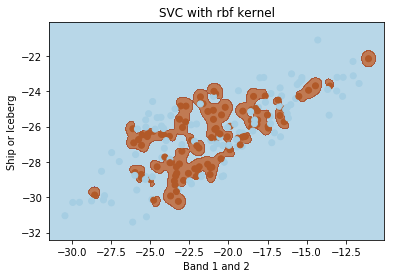

In [9]:


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=1,gamma=10).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Band 1 and 2')
plt.ylabel('Ship or Iceberg')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')
plt.show()